In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import sys
sys.path.insert(0, '../..')

import quan_utils
import pulp

In [1]:
prob_df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = prob_df['Real'].value_counts()

NameError: name 'pd' is not defined

In [3]:
helper = quan_utils.AssignmentHelper(name='test')
helper.update_constraints(fairness_best_constraint=0)

sol_df = helper.ip_solve()
if sol_df is False:
    print('No solution found')

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


No solution found


In [3]:
def obj_f(real_fair_constraint, best_fair_constraint):
    helper = quan_utils.AssignmentHelper()
    helper.update_constraints(
        fairness_constraint=real_fair_constraint,
        fairness_best_constraint=best_fair_constraint
    )
    
    sol_df = helper.ip_solve()
    
    if sol_df is False:
        return False
    
    real_n_reentries, bart_n_reentries, sol_n_reentries = helper.compare_reentry(sol_df, verbose=False)
    prob_compare_df = helper.compare_prob(sol_df)
    
    return (
        (real_n_reentries - sol_n_reentries) / real_n_reentries * 100,
        prob_compare_df
    )

In [5]:
real_fair_constraints = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
best_fair_constraints = [0.8, 0.7, 0.6, 0.5, 0.4]

In [6]:
pct_reductions = np.zeros(
    (len(real_fair_constraints),
     len(best_fair_constraints))
)
input_to_real = pd.DataFrame(columns=[f'{real_c}_{best_c}' 
                                      for real_c in real_fair_constraints 
                                      for best_c in best_fair_constraints])
input_to_best = pd.DataFrame(columns=[f'{real_c}_{best_c}' 
                                      for real_c in real_fair_constraints 
                                      for best_c in best_fair_constraints])

for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        print(real_c, best_c)
        
        result = obj_f(real_c, best_c)
        if result is not False:
            pct_reductions[real_c_i, best_c_i] = result[0]
            input_to_real[f'{real_c}_{best_c}'] = result[1]['Input_to_real']
            input_to_best[f'{real_c}_{best_c}'] = result[1]['Input_to_best']
        else:
            pct_reductions[real_c_i, best_c_i] = np.nan
            input_to_real[f'{real_c}_{best_c}'] = np.nan
            input_to_best[f'{real_c}_{best_c}'] = np.nan

0 0.8
0 0.7
0 0.6
0 0.5


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.04 0.8
0.04 0.7
0.04 0.6
0.04 0.5
0.04 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.08 0.8
0.08 0.7
0.08 0.6
0.08 0.5
0.08 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.12 0.8
0.12 0.7
0.12 0.6
0.12 0.5
0.12 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.16 0.8
0.16 0.7
0.16 0.6
0.16 0.5
0.16 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.2 0.8
0.2 0.7
0.2 0.6
0.2 0.5
0.2 0.4


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


# Distance from the original allocation

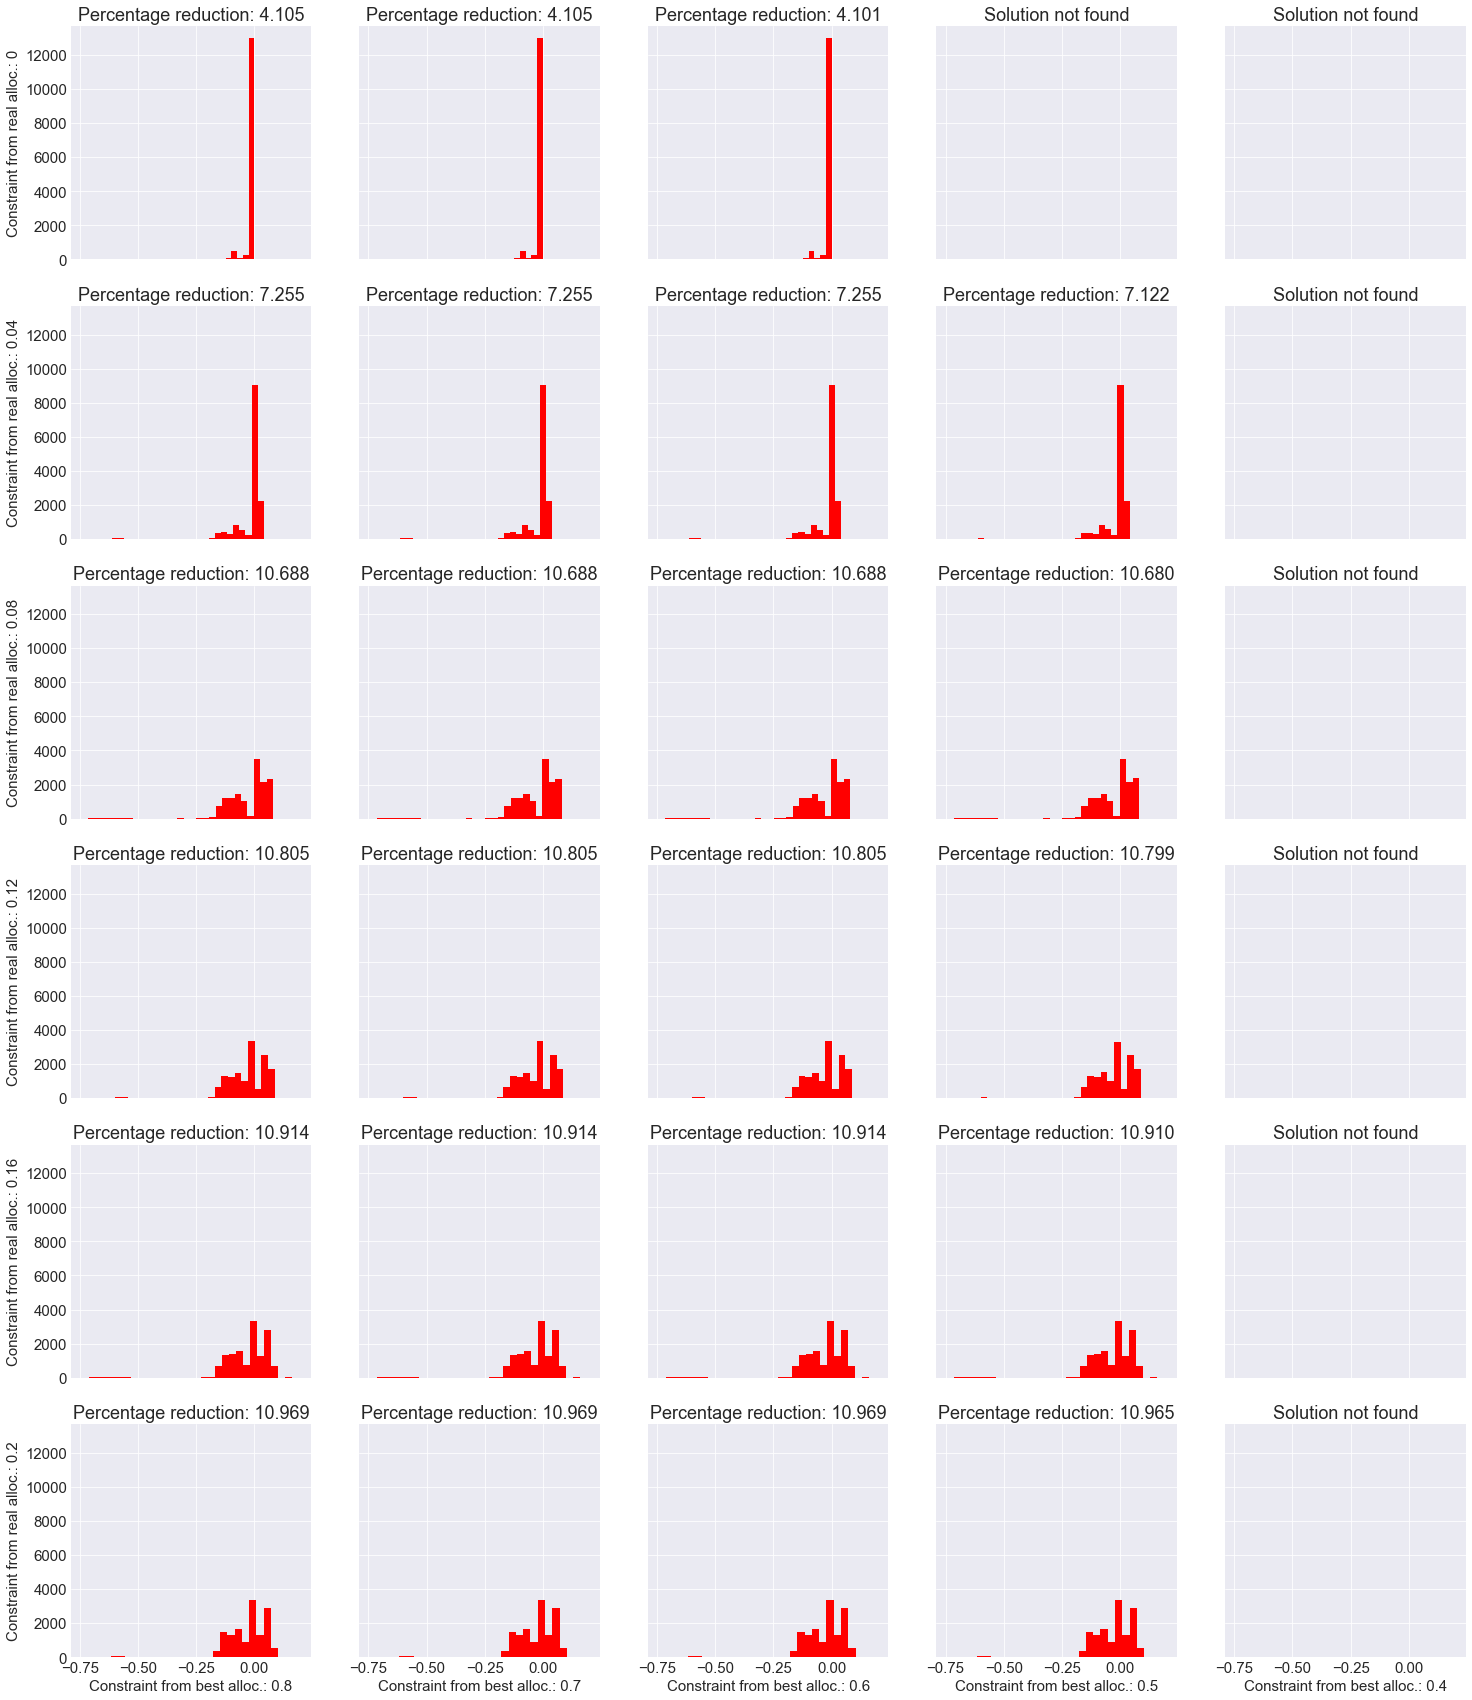

In [7]:
f, ax = plt.subplots(
    len(real_fair_constraints), len(best_fair_constraints),
    figsize=(5 * len(best_fair_constraints), 5 * len(real_fair_constraints)),
    sharex=True, sharey=True
)

for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            ax[real_c_i][best_c_i].hist(
                input_to_real[f'{real_c}_{best_c}'],
                color='red',
                bins=30
            )
            
            ax[real_c_i][best_c_i].set_title(
                f'Percentage reduction: {pct_reductions[real_c_i, best_c_i]:.3f}',
            )
        
        else:
            ax[real_c_i][best_c_i].set_title('Solution not found')
    
    ax[real_c_i][0].set_ylabel(f'Constraint from real alloc.: {real_c}')
    
for best_c_i, best_c in enumerate(best_fair_constraints):
    ax[-1][best_c_i].set_xlabel(f'Constraint from best alloc.: {best_c}')

plt.show()

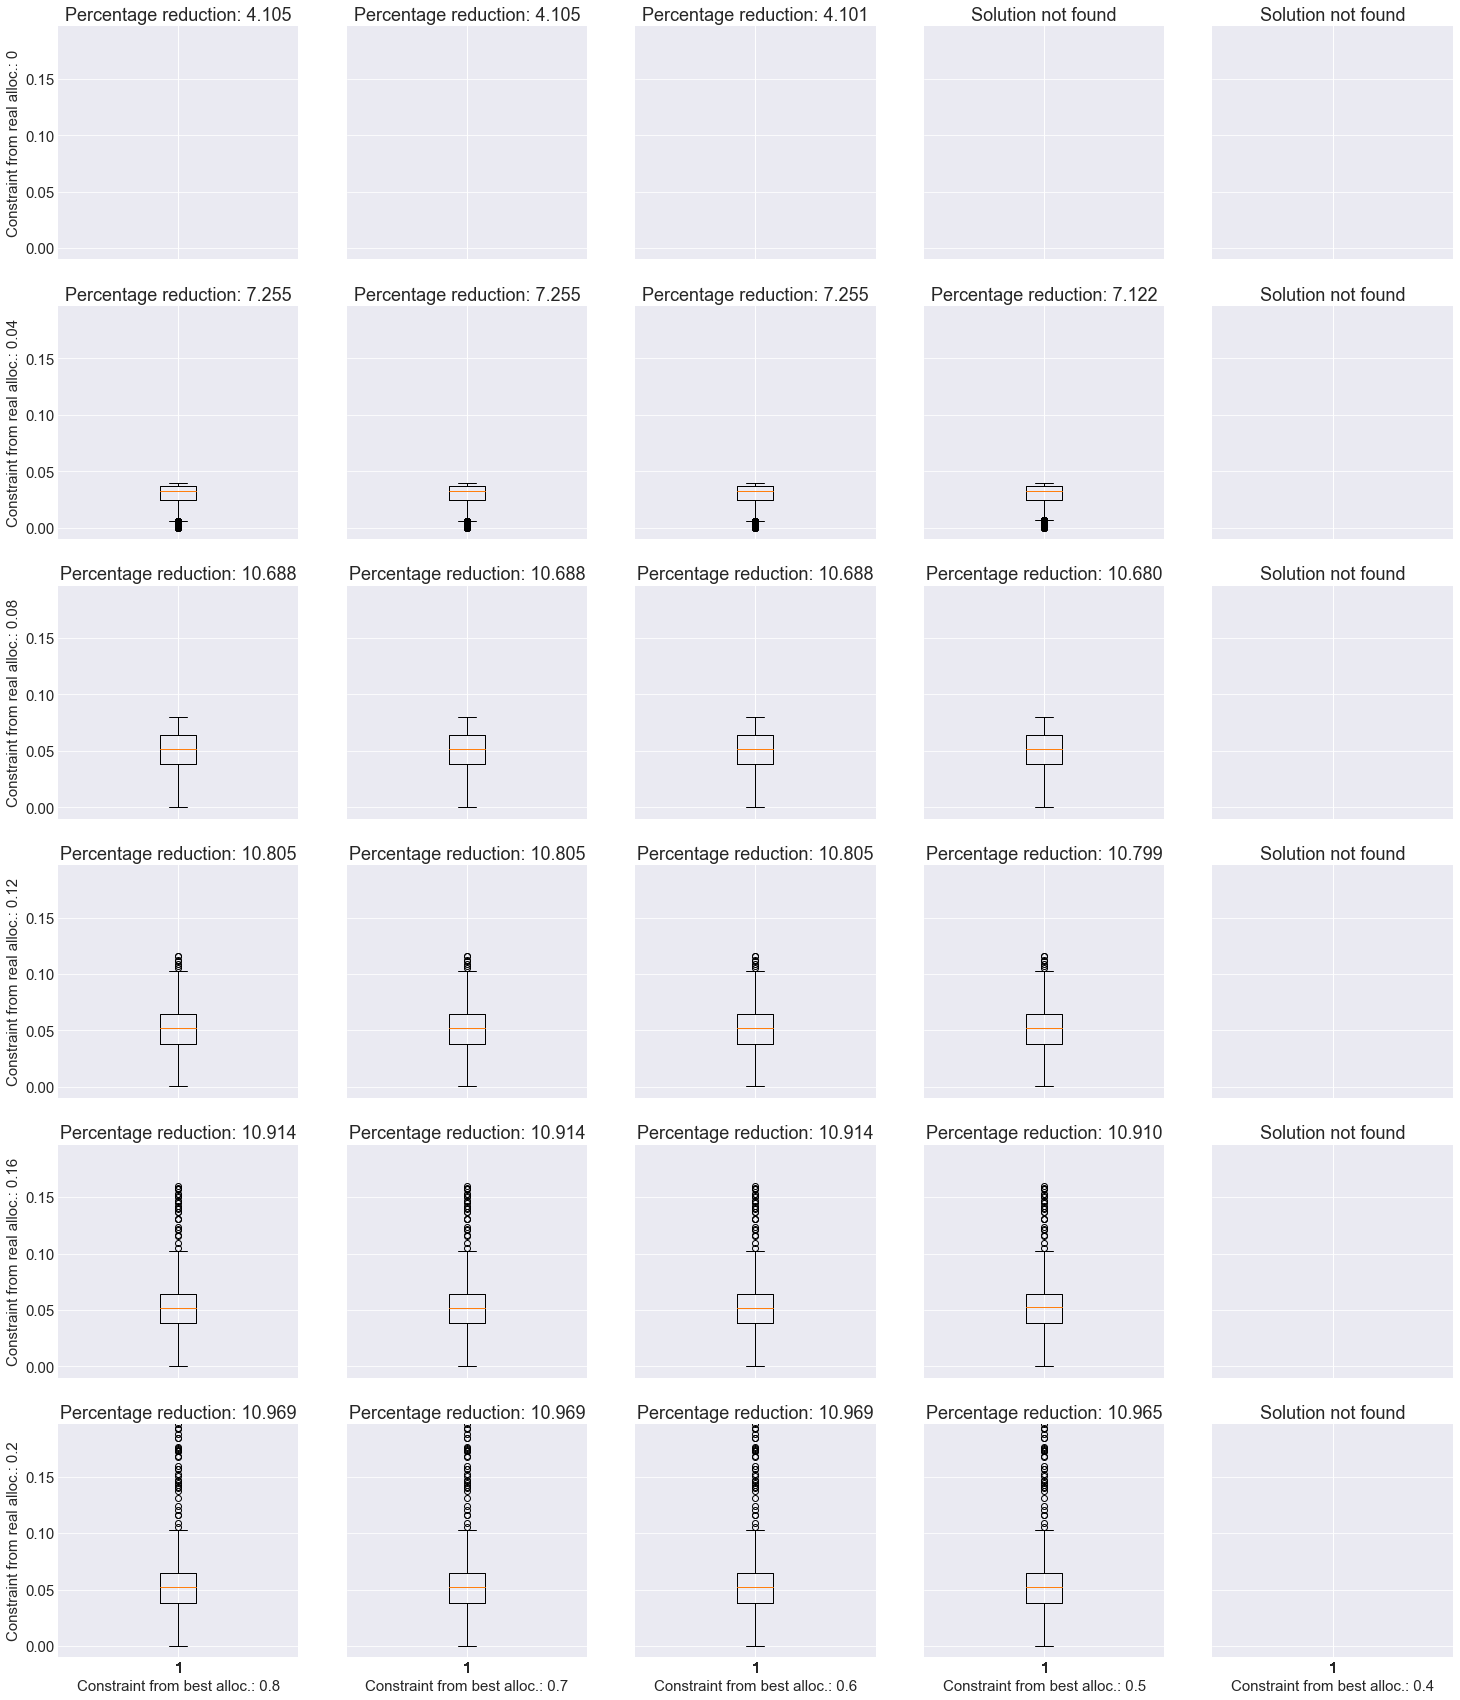

In [8]:
f, ax = plt.subplots(
    len(real_fair_constraints), len(best_fair_constraints),
    figsize=(5 * len(best_fair_constraints), 5 * len(real_fair_constraints)),
    sharex=True, sharey=True
)

for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            ax[real_c_i][best_c_i].boxplot(
                input_to_real[input_to_real[f'{real_c}_{best_c}'] > 0][f'{real_c}_{best_c}']
            )
            
            ax[real_c_i][best_c_i].set_title(
                f'Percentage reduction: {pct_reductions[real_c_i, best_c_i]:.3f}',
            )
        
        else:
            ax[real_c_i][best_c_i].set_title('Solution not found')
        
        ax[real_c_i][best_c_i].set_ylim(-0.01, input_to_real.max().max())
    
    ax[real_c_i][0].set_ylabel(f'Constraint from real alloc.: {real_c}')
    
for best_c_i, best_c in enumerate(best_fair_constraints):
    ax[-1][best_c_i].set_xlabel(f'Constraint from best alloc.: {best_c}')

plt.show()

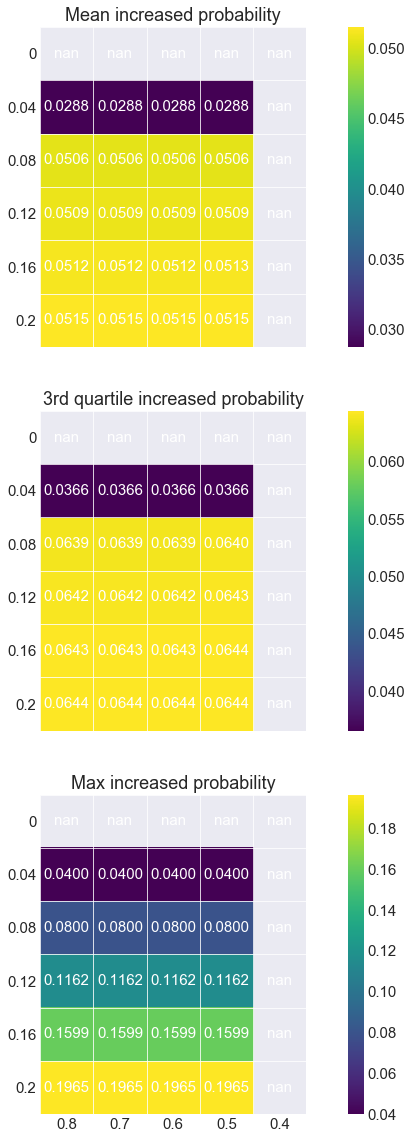

In [9]:
means = []
thirdqs = []
maxes = []

for real_c_i, real_c in enumerate(real_fair_constraints):
    means.append([])
    thirdqs.append([])
    maxes.append([])
    
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            means[-1].append(
                input_to_real[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].mean()
            )
            thirdqs[-1].append(
                input_to_real[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].quantile(0.75)
            )
            maxes[-1].append(
                input_to_real[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].max()
            )
        else:
            means[-1].append(np.nan)
            thirdqs[-1].append(np.nan)
            maxes[-1].append(np.nan)
            
f, ax = plt.subplots(3, 1, figsize=(15, 20), sharex=True, sharey=True)

m = ax[0].imshow(means, cmap='viridis')
f.colorbar(m, ax=ax[0])
ax[0].set_title('Mean increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[0].text(best_c_i, real_c_i, f'{means[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')
        
m = ax[1].imshow(thirdqs, cmap='viridis')
f.colorbar(m, ax=ax[1])
ax[1].set_title('3rd quartile increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[1].text(best_c_i, real_c_i, f'{thirdqs[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')
        
m = ax[2].imshow(maxes, cmap='viridis')
f.colorbar(m, ax=ax[2])
ax[2].set_title('Max increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[2].text(best_c_i, real_c_i, f'{maxes[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')

ax[0].set_yticks([i for i in range(len(real_fair_constraints))])
ax[0].set_yticklabels(real_fair_constraints)
ax[1].set_yticks([i for i in range(len(real_fair_constraints))])
ax[1].set_yticklabels(real_fair_constraints)
ax[2].set_yticks([i for i in range(len(real_fair_constraints))])
ax[2].set_yticklabels(real_fair_constraints)

ax[2].set_xticks([j for j in range(len(best_fair_constraints))])
ax[2].set_xticklabels(best_fair_constraints)

for row in range(3):
    ax[row].set_xticks(
        [i - 0.5 for i in range(len(best_fair_constraints))], 
        minor=True
    )
    ax[row].set_yticks(
        [i - 0.5 for i in range(len(real_fair_constraints))], 
        minor=True
    )
    ax[row].grid(b=None)
    ax[row].grid(which='minor')

plt.show()

# Distance from the best unconstrained allocation

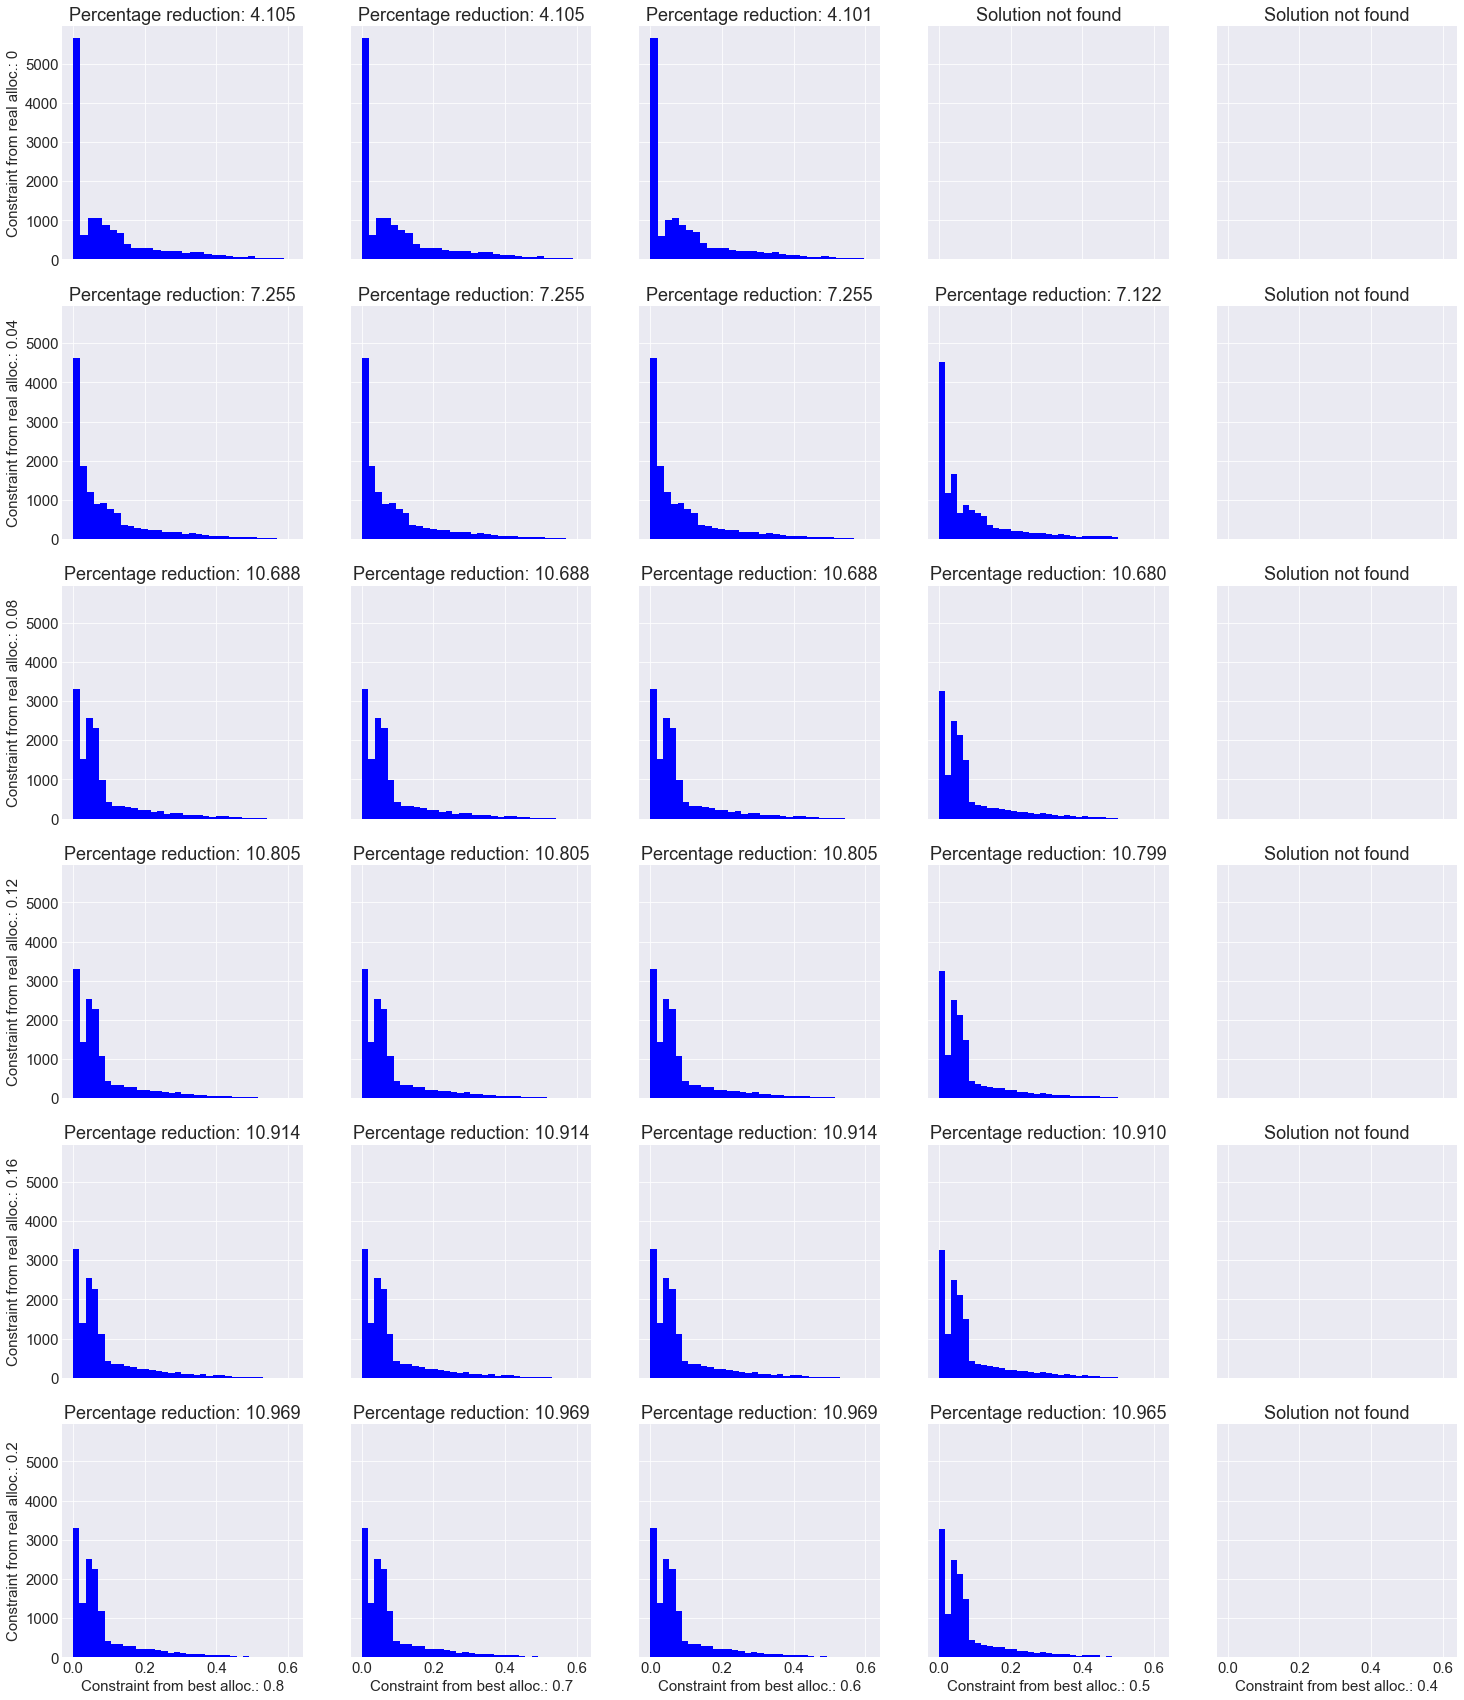

In [10]:
f, ax = plt.subplots(
    len(real_fair_constraints), len(best_fair_constraints),
    figsize=(5 * len(best_fair_constraints), 5 * len(real_fair_constraints)),
    sharex=True, sharey=True
)

for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            ax[real_c_i][best_c_i].hist(
                input_to_best[f'{real_c}_{best_c}'],
                color='blue',
                bins=30
            )
            
            ax[real_c_i][best_c_i].set_title(
                f'Percentage reduction: {pct_reductions[real_c_i, best_c_i]:.3f}',
            )
        
        else:
            ax[real_c_i][best_c_i].set_title('Solution not found')
    
    ax[real_c_i][0].set_ylabel(f'Constraint from real alloc.: {real_c}')
    
for best_c_i, best_c in enumerate(best_fair_constraints):
    ax[-1][best_c_i].set_xlabel(f'Constraint from best alloc.: {best_c}')

plt.show()

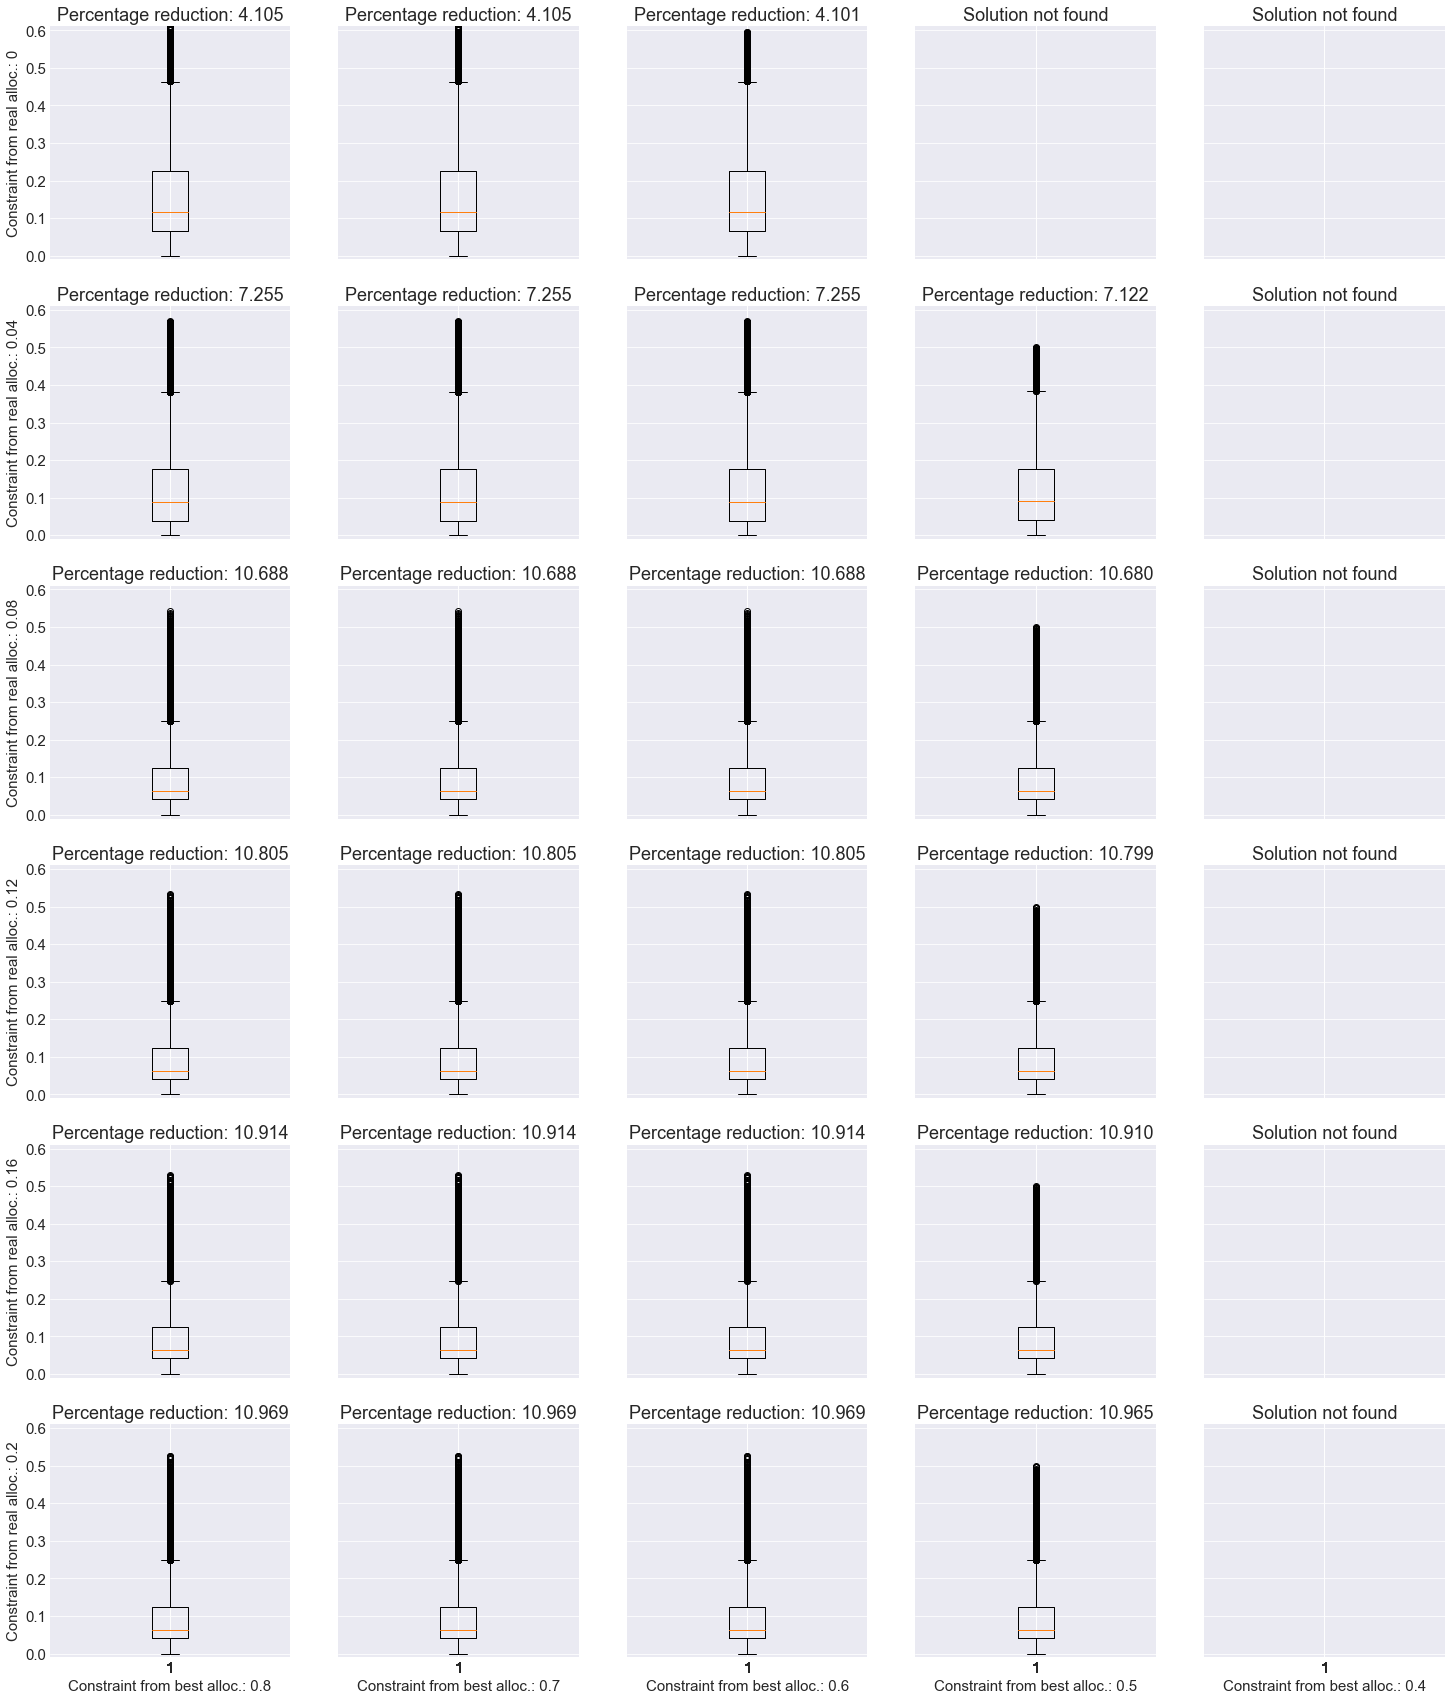

In [11]:
f, ax = plt.subplots(
    len(real_fair_constraints), len(best_fair_constraints),
    figsize=(5 * len(best_fair_constraints), 5 * len(real_fair_constraints)),
    sharex=True, sharey=True
)

for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            ax[real_c_i][best_c_i].boxplot(
                input_to_best[input_to_best[f'{real_c}_{best_c}'] > 0][f'{real_c}_{best_c}']
            )
            
            ax[real_c_i][best_c_i].set_title(
                f'Percentage reduction: {pct_reductions[real_c_i, best_c_i]:.3f}',
            )
        
        else:
            ax[real_c_i][best_c_i].set_title('Solution not found')
        
        ax[real_c_i][best_c_i].set_ylim(-0.01, input_to_best.max().max())
    
    ax[real_c_i][0].set_ylabel(f'Constraint from real alloc.: {real_c}')
    
for best_c_i, best_c in enumerate(best_fair_constraints):
    ax[-1][best_c_i].set_xlabel(f'Constraint from best alloc.: {best_c}')

plt.show()

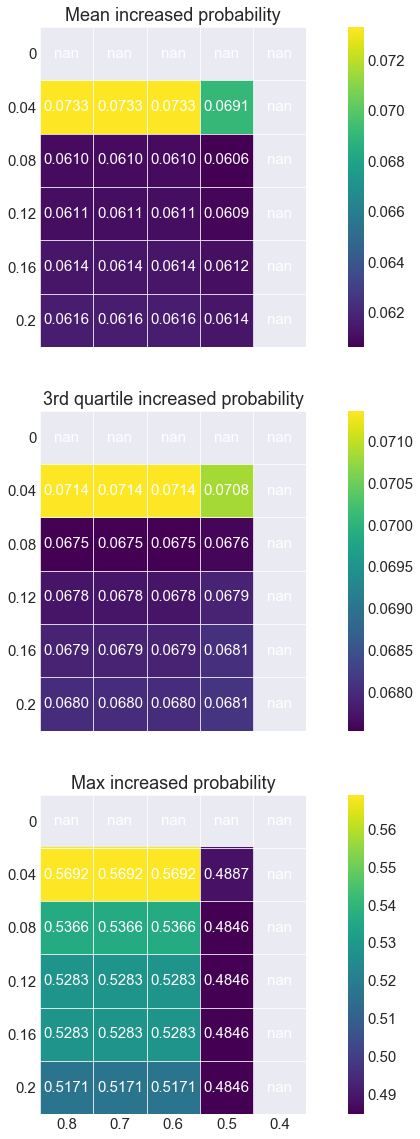

In [12]:
means = []
thirdqs = []
maxes = []

for real_c_i, real_c in enumerate(real_fair_constraints):
    means.append([])
    thirdqs.append([])
    maxes.append([])
    
    for best_c_i, best_c in enumerate(best_fair_constraints):
        if not np.isnan(pct_reductions[real_c_i, best_c_i]):
            means[-1].append(
                input_to_best[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].mean()
            )
            thirdqs[-1].append(
                input_to_best[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].quantile(0.75)
            )
            maxes[-1].append(
                input_to_best[
                    input_to_real[f'{real_c}_{best_c}'] > 0
                ][f'{real_c}_{best_c}'].max()
            )
        else:
            means[-1].append(np.nan)
            thirdqs[-1].append(np.nan)
            maxes[-1].append(np.nan)
            
f, ax = plt.subplots(3, 1, figsize=(15, 20), sharex=True, sharey=True)

m = ax[0].imshow(means, cmap='viridis')
f.colorbar(m, ax=ax[0])
ax[0].set_title('Mean increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[0].text(best_c_i, real_c_i, f'{means[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')
        
m = ax[1].imshow(thirdqs, cmap='viridis')
f.colorbar(m, ax=ax[1])
ax[1].set_title('3rd quartile increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[1].text(best_c_i, real_c_i, f'{thirdqs[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')
        
m = ax[2].imshow(maxes, cmap='viridis')
f.colorbar(m, ax=ax[2])
ax[2].set_title('Max increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax[2].text(best_c_i, real_c_i, f'{maxes[real_c_i][best_c_i]:.4f}',
                   ha='center', va='center', color='w')

ax[0].set_yticks([i for i in range(len(real_fair_constraints))])
ax[0].set_yticklabels(real_fair_constraints)
ax[1].set_yticks([i for i in range(len(real_fair_constraints))])
ax[1].set_yticklabels(real_fair_constraints)
ax[2].set_yticks([i for i in range(len(real_fair_constraints))])
ax[2].set_yticklabels(real_fair_constraints)

ax[2].set_xticks([j for j in range(len(best_fair_constraints))])
ax[2].set_xticklabels(best_fair_constraints)

for row in range(3):
    ax[row].set_xticks(
        [i - 0.5 for i in range(len(best_fair_constraints))], 
        minor=True
    )
    ax[row].set_yticks(
        [i - 0.5 for i in range(len(real_fair_constraints))], 
        minor=True
    )
    ax[row].grid(b=None)
    ax[row].grid(which='minor')

plt.show()

In [13]:
means

[[nan, nan, nan, nan, nan],
 [0.07331357434037485,
  0.07331357434037485,
  0.07331357434037485,
  0.06909795135560019,
  nan],
 [0.06099984332101341,
  0.06099984332101341,
  0.06099984332101341,
  0.060643377450020824,
  nan],
 [0.06112378238185974,
  0.06112378238185974,
  0.06112378238185974,
  0.06086319303968593,
  nan],
 [0.06143444750464602,
  0.06143444750464602,
  0.06143444750464602,
  0.06118227296473512,
  nan],
 [0.06159884563863142,
  0.06159884563863142,
  0.06159884563863142,
  0.06142984591371517,
  nan]]

In [14]:
thirdqs

[[nan, nan, nan, nan, nan],
 [0.07136677999999999,
  0.07136677999999999,
  0.07136677999999999,
  0.0708495655,
  nan],
 [0.06753788600000002,
  0.06753788600000002,
  0.06753788600000002,
  0.06758635025000001,
  nan],
 [0.067756472, 0.067756472, 0.067756472, 0.06790056700000002, nan],
 [0.06790452500000001,
  0.06790452500000001,
  0.06790452500000001,
  0.06806505300000001,
  nan],
 [0.06802824749999997,
  0.06802824749999997,
  0.06802824749999997,
  0.06810969675,
  nan]]

In [15]:
maxes

[[nan, nan, nan, nan, nan],
 [0.569197336, 0.569197336, 0.569197336, 0.48865350400000007, nan],
 [0.536594698, 0.536594698, 0.536594698, 0.484626507, nan],
 [0.5282528830000001,
  0.5282528830000001,
  0.5282528830000001,
  0.484626507,
  nan],
 [0.5282528830000001,
  0.5282528830000001,
  0.5282528830000001,
  0.484626507,
  nan],
 [0.517141758, 0.517141758, 0.517141758, 0.484626507, nan]]

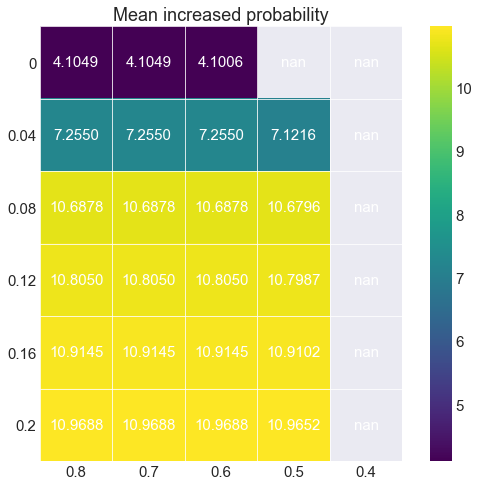

In [16]:
f, ax = plt.subplots(figsize=(10, 8), sharex=True, sharey=True)

m = ax.imshow(pct_reductions, cmap='viridis')
f.colorbar(m, ax=ax)
ax.set_title('Mean increased probability')
for real_c_i, real_c in enumerate(real_fair_constraints):
    for best_c_i, best_c in enumerate(best_fair_constraints):
        ax.text(best_c_i, real_c_i, f'{pct_reductions[real_c_i, best_c_i]:.4f}',
                   ha='center', va='center', color='w')

ax.set_yticks([i for i in range(len(real_fair_constraints))])
ax.set_yticklabels(real_fair_constraints)

ax.set_xticks([j for j in range(len(best_fair_constraints))])
ax.set_xticklabels(best_fair_constraints)


ax.set_xticks(
    [i - 0.5 for i in range(len(best_fair_constraints))], 
    minor=True
)
ax.set_yticks(
    [i - 0.5 for i in range(len(real_fair_constraints))], 
    minor=True
)
ax.grid(b=None)
ax.grid(which='minor')

plt.show()